# Get the total percentages from 2017-2024 based on play count

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

## Function to get the total percentages for every season

In [25]:
def total_percentages(csvList):
    # Load all the csv files
    dfList = [pd.read_csv(f) for f in csvList]

    # Combine dataframes
    dfCombined = pd.concat(dfList, ignore_index=True)

    # Drop shortname and other column
    combined = dfCombined.drop(columns=["ShortName", "Other"], errors="ignore")

    # Get total counts
    totals = combined.sum()

    # Get percentages
    percentages = (totals / totals.sum()) * 100

    return totals, percentages

## Percentages for top 10 teams of every season

In [26]:
top10CSV = ["play_counts/2017_top10_play_counts.csv",
            "play_counts/2018_top10_play_counts.csv",
            "play_counts/2019_top10_play_counts.csv",
            "play_counts/2020_top10_play_counts.csv",
            "play_counts/2021_top10_play_counts.csv",
            "play_counts/2022_top10_play_counts.csv",
            "play_counts/2023_top10_play_counts.csv",
            "play_counts/2024_top10_play_counts.csv"]

top10Totals, top10Percent = total_percentages(top10CSV)
print(top10Totals)
print(top10Percent)

Field Goal     3364
Pass          53480
Punt           6293
Run           45573
Timeout        6311
Touchdown      5059
Turnover       1111
dtype: int64
Field Goal     2.775784
Pass          44.128689
Punt           5.192630
Run           37.604278
Timeout        5.207482
Touchdown      4.174402
Turnover       0.916735
dtype: float64


In [27]:
bottom10CSV = ["play_counts/2017_bottom10_play_counts.csv",
            "play_counts/2018_bottom10_play_counts.csv",
            "play_counts/2019_bottom10_play_counts.csv",
            "play_counts/2020_bottom10_play_counts.csv",
            "play_counts/2021_bottom10_play_counts.csv",
            "play_counts/2022_bottom10_play_counts.csv",
            "play_counts/2023_bottom10_play_counts.csv",
            "play_counts/2024_bottom10_play_counts.csv"]

bottom10Totals, bottom10Percent = total_percentages(bottom10CSV)
print(bottom10Totals)
print(bottom10Percent)

Field Goal     2811
Pass          48932
Punt           6930
Run           36825
Timeout        4928
Touchdown      3242
Turnover       1256
dtype: int64
Field Goal     2.679082
Pass          46.635660
Punt           6.604781
Run           35.096832
Timeout        4.696733
Touchdown      3.089856
Turnover       1.197057
dtype: float64


## Bar chart comparison

<Figure size 1000x600 with 0 Axes>

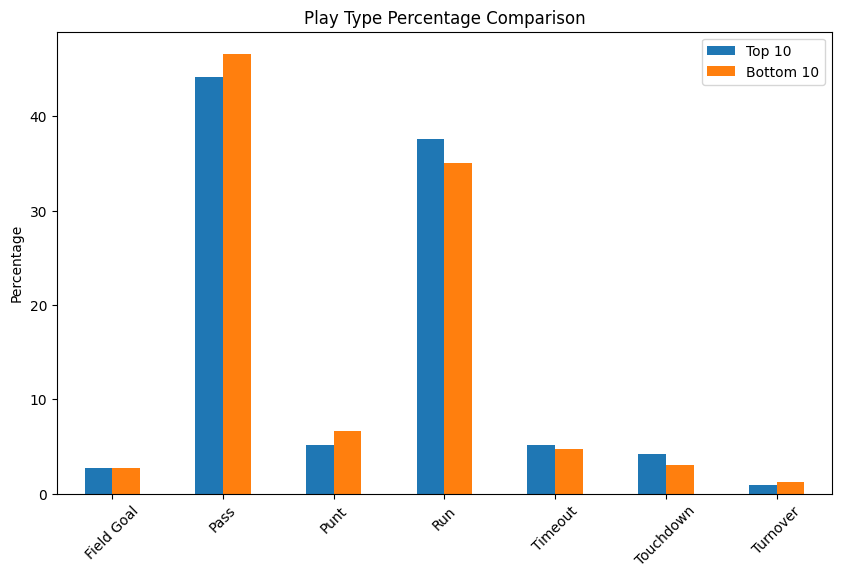

In [32]:
plt.figure(figsize=(10, 6))

df = pd.concat([top10Percent, bottom10Percent], axis=1)
df.columns = ["Top 10", "Bottom 10"]

df.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Percentage")
plt.title("Play Type Percentage Comparison")
plt.xticks(rotation=45)
plt.legend()
plt.show()